# Visualização de Dados

Após interagir com dados externos como arquivos CSV e banco de dados com o Pandas e outras ferramentas, vamos agora a uma das etapas finais do processo de anáise de dados: visualização.

## Matplotlib

A biblioteca mais usada para fazer visualização de dados é a Matplotlib que foi criada para se assemelhar com vários recursos do MATLAB, e ela se integra bem com outras ferramentas como NumPy, SciPy e Pandas. Uma ótima forma de aprender a usar o Matplotlib é vendo exemplos em sua [galeria][matplotlib-gallery]. 

[matplotlib-gallery]: https://matplotlib.org/gallery.html

### Gráfico de linha

O método básico é o `plot`:



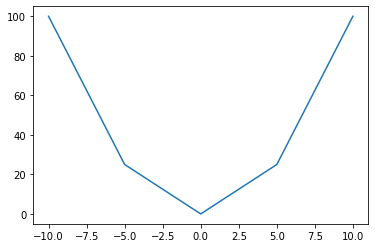

In [1]:
import matplotlib.pyplot as plt # Importado desta forma por convenção
import numpy as np

x = np.linspace(-10, 10, 5)
y = x ** 2

plt.plot(x, y)

Por padrão, o `plot` desenha uma linha azul, mas temos a liberdade de escolher o tipo de linha e cor:

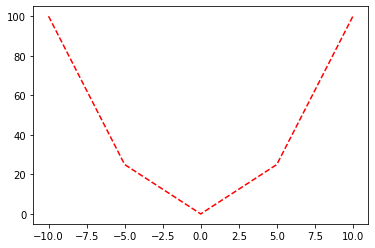

In [2]:
plt.plot(x, y, 'r--')

Para um controle melhor, podemos usar os argumentos `marker`, `ls` e `color`, para o tipo de marcador, tipo de linha (*line style*) e cor, respectivamente.

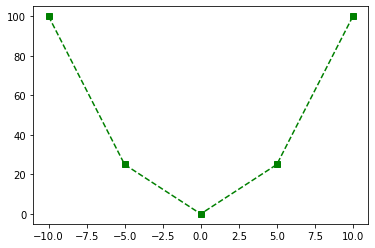

In [3]:
plt.plot(x, y, marker='s', color='g', ls='--')

Para adicionar mais de uma curva no gráfico, basta usar outro `plt.plot`. Neste caso, podemos introduzir também uma legenda para facilitar a identificação das curvas.

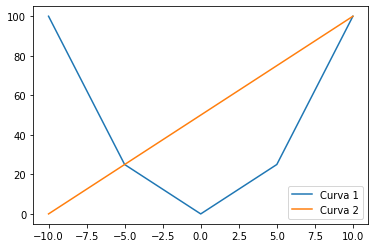

In [4]:
z = 5*x + 50

plt.plot(x, y, label='Curva 1')
plt.plot(x, z, label='Curva 2') 

plt.legend()

### Gráfico de dispersão

Neste tipo de gráfico, estamos mostrando duas variáveis numéricas com pontos. 

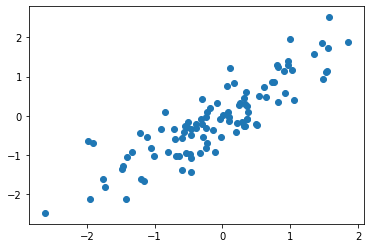

In [5]:
np.random.seed(42) # Configruando a semente para que resultado seja reprodutível.

x = np.random.normal(size=100)
y = x + np.random.normal(scale=0.5, size=100)

plt.scatter(x, y)

Podemos usar alguns dos mesmos argumentos disponíveis no método `plot`. Por exemplo:

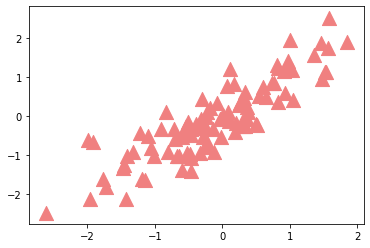

In [6]:
plt.scatter(
    x, y, 
    color='#f08080', # Podemos usar o formato de cor hexadecimal e RGB também
    marker='^', 
    s=200 # Tamanho dos marcadores
)

### Histogramas

Histogramas são usados para visualizar distribuições, por exemplo as idades de um grupo de pessoas:

(array([  2.,  11.,  49., 114., 135., 119.,  48.,  18.,   3.,   1.]),
 array([ 7.5873266 , 14.68132543, 21.77532426, 28.86932309, 35.96332192,
        43.05732075, 50.15131958, 57.24531841, 64.33931725, 71.43331608,
        78.52731491]),
 <a list of 10 Patch objects>)

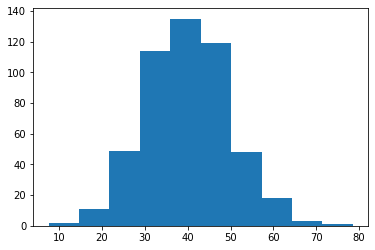

In [7]:
np.random.seed(42)
idades = np.random.normal(loc=40, scale=10, size=500)

plt.hist(idades)

Por padrão, o método define sozinho os intervalos de cada categoria, mas temos a liberdade de alterar:

(array([  0.,   1.,   1.,   5.,  20.,  49.,  84.,  86., 102.,  81.,  35.,
         23.,  10.,   1.,   1.,   1.,   0.,   0.,   0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

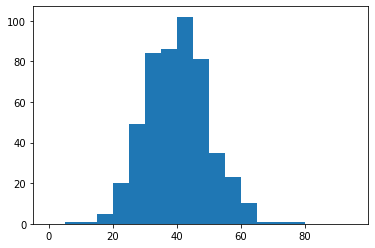

In [8]:
plt.hist(idades, bins=range(0,100, 5))

Uma formatação interessante a se fazer é definir as bordas dos intervalos para facilitar a visualização.

(array([  0.,   1.,   1.,   5.,  20.,  49.,  84.,  86., 102.,  81.,  35.,
         23.,  10.,   1.,   1.,   1.,   0.,   0.,   0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

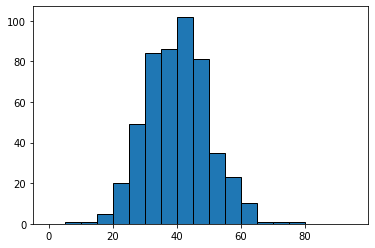

In [9]:
plt.hist(idades, bins=range(0,100, 5), edgecolor='k')

### Gráfico de barras

Outro gráfico bastante usado é o de barras para mostrar valores numéricos associados a categorias:

<BarContainer object of 3 artists>

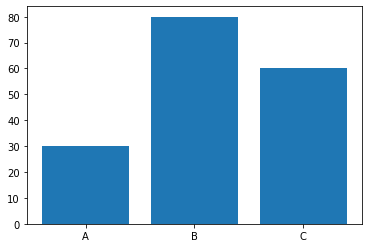

In [10]:
categorias = ['A', 'B', 'C']
valores = [30, 80, 60]

plt.bar(categorias, valores)

Podemos usar barras horizontais:

<BarContainer object of 3 artists>

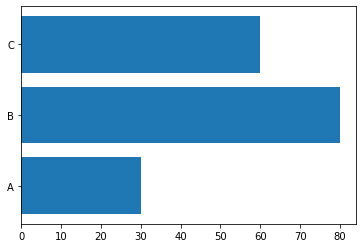

In [11]:
plt.barh(categorias, valores)

### Adicionando recursos

Os gráficos do Matplotlib são bem customizáveis. Na figura abaixo, é possível mudar todos os elementos:

![Anatomy of a figure](https://matplotlib.org/_images/anatomy.png)

Nós já vimos como adicionar legendas anteriormente e veremos agora alguns outros recursos.

(-6, 6)

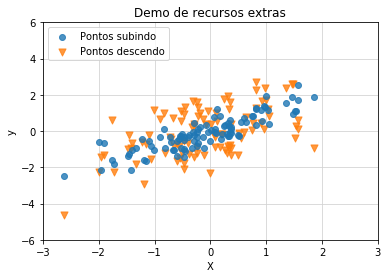

In [12]:
np.random.seed(123)
z = y + np.random.normal(size=len(y))

plt.scatter(
    x, y, 
    label='Pontos subindo', 
    zorder=5, # configura ordem de desenho do elemento gráfico
    alpha=0.8 # configura opacidade do ponto: 0 é transparente e 1, opaco.
)
plt.scatter(
    x, z, 
    marker='v', 
    s=50, 
    label='Pontos descendo', 
    zorder=2,
    alpha=0.8
)

plt.legend(loc='upper left') # trocando a posição da legenda

plt.title("Demo de recursos extras")
plt.xlabel("X")
plt.ylabel("y")

plt.grid(zorder=0, color='lightgray') # configura grade

# configura extensão dos eixos
plt.xlim([-3, 3])
plt.ylim([-6, 6])

### Gráficos e objetos

A forma de fazer gráficos que vimos até agora foi criada assim para se assemelhar com o MATLAB. Como o Python é uma linguagem orientada a objetos, também é possível criar gráficos com objetos.

(-6, 6)

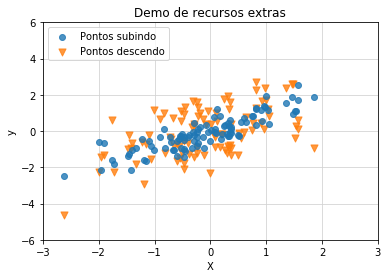

In [13]:
fig = plt.figure()

ax = fig.add_subplot()

ax.scatter(
    x, y, 
    label='Pontos subindo', 
    zorder=5, # configura ordem de desenho do elemento gráfico
    alpha=0.8 # configura opacidade do ponto: 0 é transparente e 1, opaco.
)
ax.scatter(
    x, z, 
    marker='v', 
    s=50, 
    label='Pontos descendo', 
    zorder=2,
    alpha=0.8
)

ax.legend(loc='upper left') # trocando a posição da legenda

ax.set_title("Demo de recursos extras")
ax.set_xlabel("X")
ax.set_ylabel("y")

ax.grid(zorder=0, color='lightgray') # configura grade

# configura extensão dos eixos
ax.set_xlim([-3, 3])
ax.set_ylim([-6, 6])

## Pandas e Matplotlib

O Pandas possui um módulo de visualização que utiliza recursos do Matplotlib. Vamos criar um `DataFrame` de exemplo e fazer alguns gráficos.

In [14]:
import pandas as pd
import random

random.seed(42)

df = pd.DataFrame(
    dict(
        tempo=random.choices(range(5), k=100),
        categorias=random.choices('ABC', k=100),
        medidas_1=(random.random() for i in range(100)),
        medidas_2=(random.random() for i in range(100)),
        medidas_3=(random.random() for i in range(100))

    )
)
df

,tempo,categorias,medidas_1,medidas_2,medidas_3
0,3,A,0.968996,0.903929,0.442160
1,0,C,0.926367,0.545590,0.213701
2,1,C,0.848696,0.834595,0.473186
3,1,B,0.166311,0.582510,0.901181
4,3,A,0.485641,0.148094,0.796025
...,...,...,...,...,...
95,1,C,0.551680,0.286914,0.679142
96,4,B,0.427687,0.429888,0.404317
97,2,A,0.009670,0.579985,0.165045
98,4,C,0.075244,0.654706,0.467390


A maioria dos gráfiocs são feitos usando o método `plot`. 

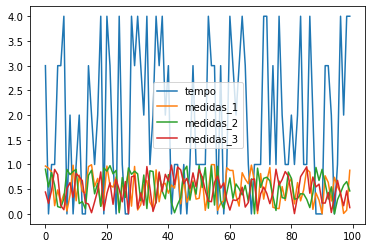

In [15]:
df.plot()

Neste caso, ele colocou no gráfico apenas as variávies númericas no eixo y. No eixo x, o pandas usou o índice. Foi adicionado uma legenda automaticamente. 

Podemos definir quais colunas usar nos eixos:

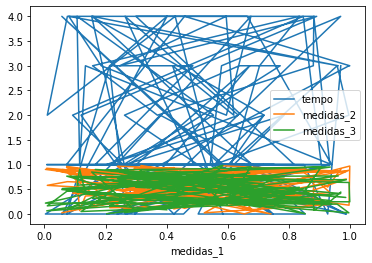

In [16]:
df.plot(x='medidas_1')

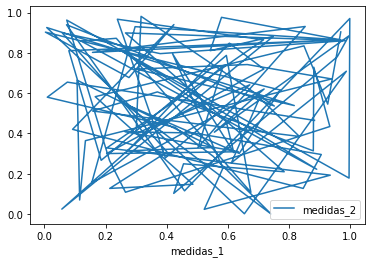

In [17]:
df.plot(x='medidas_1', y='medidas_2')

Por padrão, é feito o gráfico de linha, mas podemos definir qual o tipo usando o atributo `kind`:

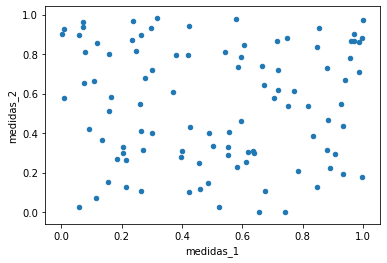

In [18]:
df.plot(x='medidas_1', y='medidas_2', kind='scatter')

Ou chamar o tipo diretamente:

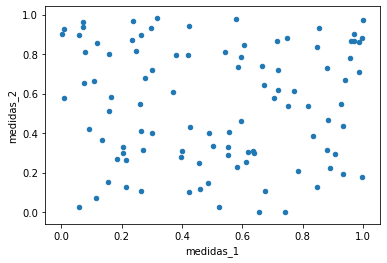

In [19]:
df.plot.scatter(x='medidas_1', y='medidas_2')

Ao criar um gráfico com o Pandas, nos é retornado um objeto do tipo `matplotlib.axes` que podemos usar para aprimorar o gráfico:

Objeto retornado: AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Exemplo')

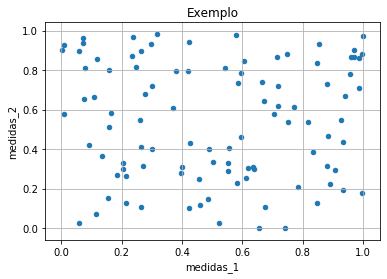

In [20]:
ax = df.plot.scatter(x='medidas_1', y='medidas_2')

print('Objeto retornado:', ax)

ax.grid()
ax.set_title('Exemplo')

Assim, com o Pandas, é possível encadear diversas operações de análise e finalizar com o gráfico:

(0, 1)

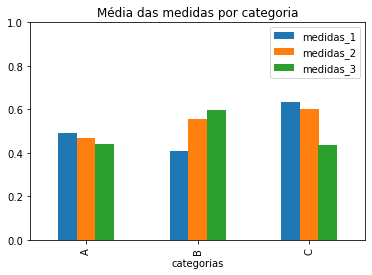

In [21]:
ax = df\
    .groupby('categorias')[['medidas_1', 'medidas_2', 'medidas_3']]\
    .mean()\
    .plot\
    .bar()

ax.set_title("Média das medidas por categoria")

ax.set_ylim([0,1])

Há um tipo de gráfico para o qual não precisamos do método `plot`: o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0175b02890>,
      dtype=object)

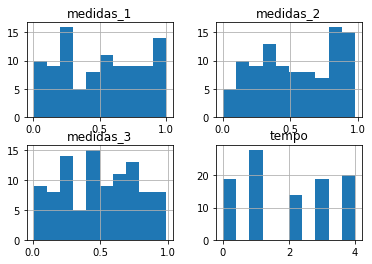

In [22]:
df.hist()

O Pandas detectou que temos três medidas numéricas e fez um *subplot* para cada medida. Podemos escolher uma coluna específica.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f018547ef10>]],
      dtype=object)

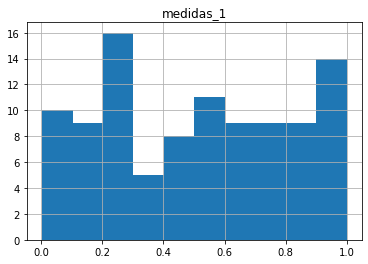

In [23]:
df.hist(column='medidas_1')

E também temos a liberdade de fazer histogramas das medidas pelas categorias.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0185394dd0>,
      dtype=object)

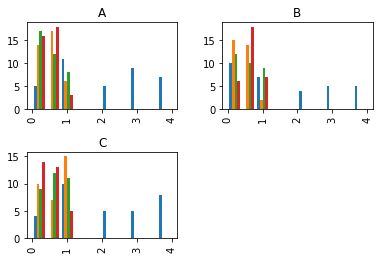

In [24]:
df.hist(by='categorias')

Para mais informações sobre visualização com o Pandas, vale a pena conferir a [documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

## Seaborn

Seaborn é uma biblioteca de visualização baseada no Matplotlib cujo foco é ser centrada no `DataFame`. Para a maioria dos gráficos, o dado de entrada é um `DataFrame`. E a estética do Seaborn é bem agradável, tornando, assim, possível fazer ótimos gráficos com pouco esforço.

Os gráficos do Seaborn podem ser divididos nas seguintes áreas:

* relacionamento entre variáveis,
* dados categóricos,
* distribuição de dados, e
* relacionamentos lineares.

Vamos ver cada um destas áreas. Recomendo também o [tutorial oficial](https://seaborn.pydata.org/tutorial.html).

### Relacionamento entre variáveis 

Neste tópico, temos os gráficos de dispersão e de linha. Abaixo, segue um exemplo de um gráfico de dispersão.

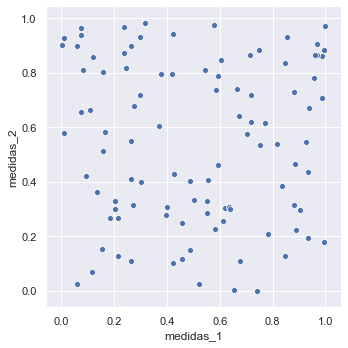

In [25]:
import seaborn as sns
sns.set(style="darkgrid") # configurando tema dos gráficos


sns.relplot(x="medidas_1", y="medidas_2", data=df);

Podemos segregar pela coluna categórica:

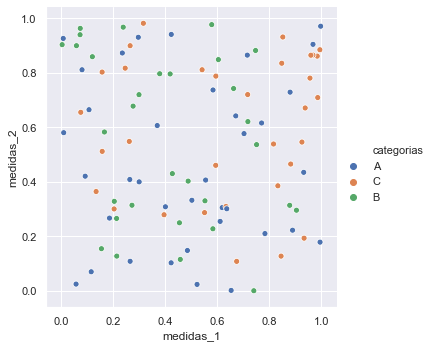

In [26]:
sns.relplot(x="medidas_1", y="medidas_2", hue='categorias', data=df)

Também temos a opção de segregar por tipo de marcador:

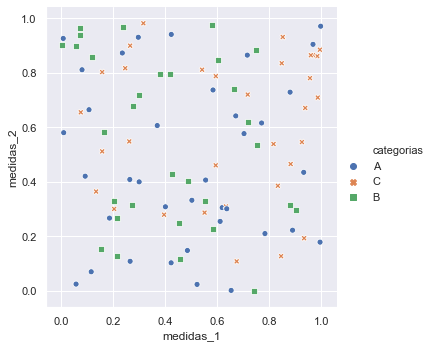

In [27]:
sns.relplot(x="medidas_1", y="medidas_2", hue='categorias', style='categorias', data=df)

E usar o tamanho dos pontos para mostrar uma terceira dimensão:

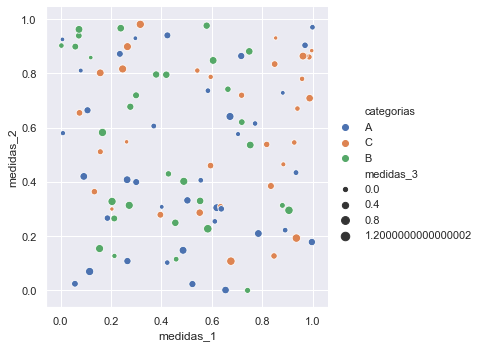

In [28]:
sns.relplot(x="medidas_1", y="medidas_2", hue='categorias', size='medidas_3', data=df)

Para faze um gráfico de linhas, usamos o argumento `kind='line'`. 

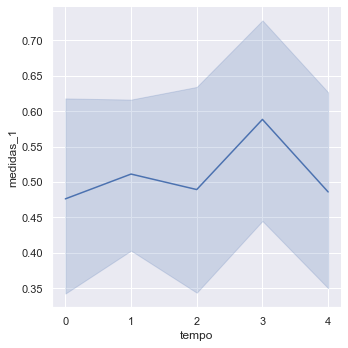

In [29]:
sns.relplot(x="tempo", y="medidas_1", kind='line', data=df)

Acima, nós temos uma área hachurada que é o intervalo de confiança da medida. Nós temos mais de um valor na coluna `medidas_1` para um valor de `tempo`:

In [30]:
df.groupby('tempo').agg(qtde=('medidas_1', 'size'), media=('medidas_1', 'mean'))

,qtde,media
tempo,,
0,19,0.476101
1,28,0.511147
2,14,0.489264
3,19,0.588390
4,20,0.485905


Assim, o Seaborn calcula a médias dos valores e mostra no gráfico como uma linha e mostra o intervalo de confiança de 95% na área hachurada.

### Dados Categóricos

O Seaborn possui suporte a visualização de dados categóricos através de gráficos de:

* barra
* dispersão categórica
* caixa
* violino
* pontos

O gráfico de barras é o mais simples:

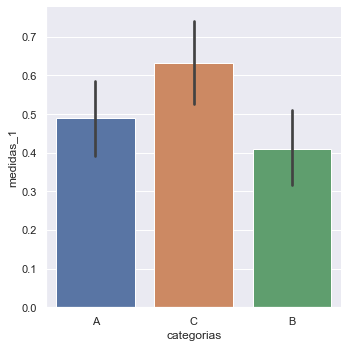

In [31]:
sns.catplot(x="categorias", y="medidas_1", kind="bar", data=df);

Por padrão, ele mostra a média e mostra o intervalo de confiança da média como uma linha vertical preta.

Caso tenhamos duas categorias, podemos usar o atributo `hue`:

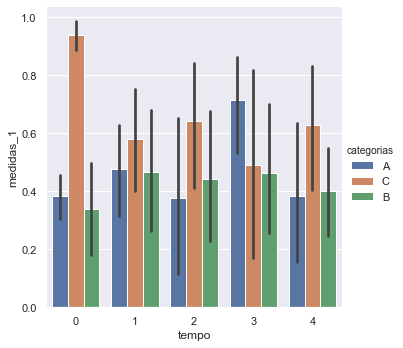

In [32]:
sns.catplot(x="tempo", y="medidas_1", kind="bar", hue='categorias', data=df);

O gráfico de dispersão categórica, caixa e violino nos permite ter uma visualização da distribuição dos pontos. 

Text(0.55, 1.03, 'Dispersão categórica')

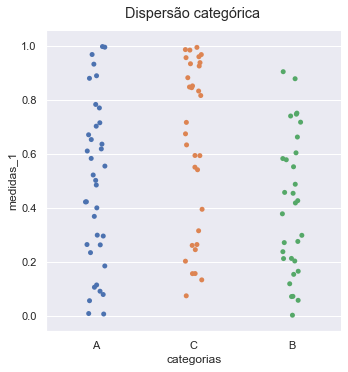

In [33]:
ax= sns.catplot(x='categorias', y='medidas_1', data=df)
ax.fig.suptitle('Dispersão categórica', x=0.55, y=1.03)

Text(0.55, 1.03, 'Boxplot')

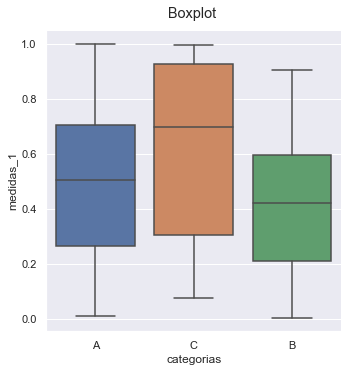

In [34]:
ax= sns.catplot(x='categorias', y='medidas_1', kind='box', data=df)
ax.fig.suptitle('Boxplot', x=0.55, y=1.03)

Text(0.55, 1.03, 'Violin')

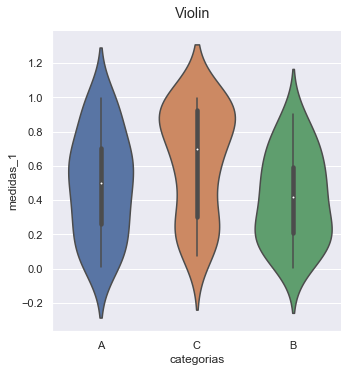

In [35]:
ax= sns.catplot(x='categorias', y='medidas_1', kind='violin', data=df)
ax.fig.suptitle('Violin', x=0.55, y=1.03)

E o gráifico de pontos nos permite ver a variação de medidas categoria a categoria.

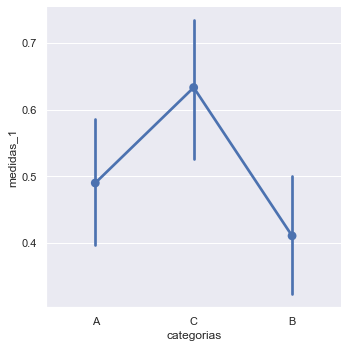

In [36]:
sns.catplot(x='categorias', y='medidas_1', kind='point', data=df)


### Distribuição de dados

Neste tópico, temos os histogramas, tando unidimensionais quanto bidimensionais.

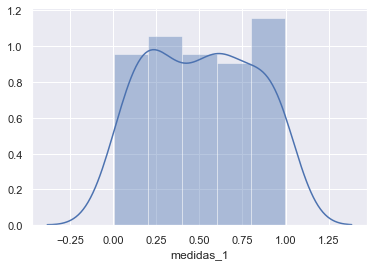

In [37]:
sns.distplot(df['medidas_1']);

Dois pontos a serem notados:
* Não passei um *DataFrame* mas, sim, um `Series`. Este método também aceita outros iteráveis como uma lista.
* A curva desenhada é uma curva de densidade.

Para dados bidimensionais, podemos fazer um gráfico de dispersão com um histograma em cada eixo representando a distribuição destas dimensões:

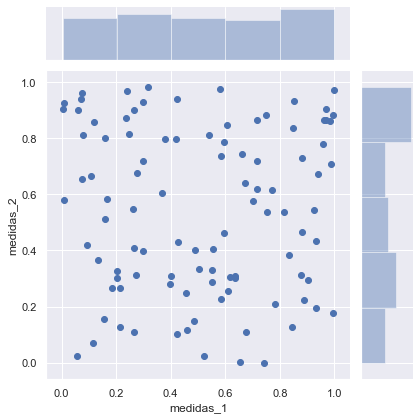

In [38]:
sns.jointplot(x="medidas_1", y="medidas_2", data=df);

Ao invés do gráfico de dispersão, podemos visualizar a distribuição bidimensional:

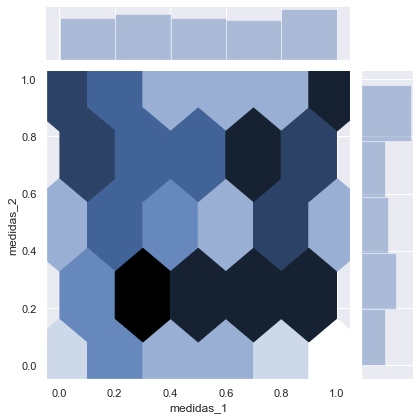

In [39]:
sns.jointplot(x="medidas_1", y="medidas_2", data=df, kind='hex');

### Relacionamentos lineares 

Nosso objetivo aqui é mostrar uma reta de regressão entre duas variáveis numéricas, $y=a\cdot x +b$.

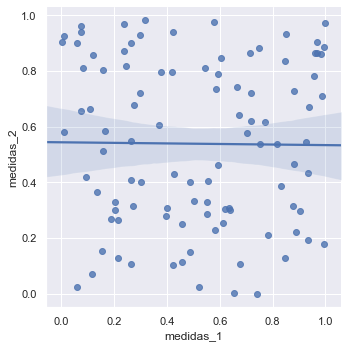

In [40]:
sns.lmplot(x="medidas_1", y="medidas_2", data=df);


Como ambas medidas são aleatórias, nossa reta de regressão é constante, mostrando que não há relacionamento entre as variáveis, como era de se esperar.

Novamente, a linha hachurada representa o intervalo de confiança de 95%.

Podemos aumentar a ordem do polinômio.

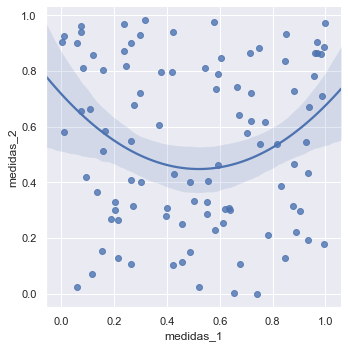

In [41]:
sns.lmplot(x="medidas_1", y="medidas_2", order=2, data=df);


E segregar por uma coluna categórica.

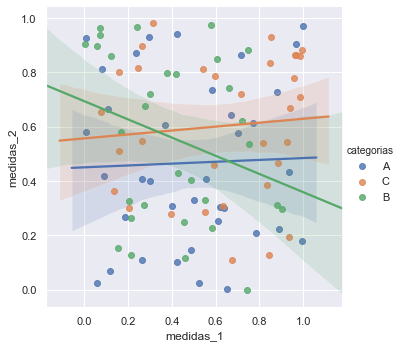

In [42]:
sns.lmplot(x="medidas_1", y="medidas_2", hue='categorias', data=df);


Há muito mais na biblioteca Seaborn e recomendo fortemente o [tutorial](https://seaborn.pydata.org/tutorial.html).